###Employees and Bus stops
- Problem fiemulation:
The company XYZ is asking you to come up with the **10 most efficient bus stops** that would best serve its employees. Generally speaking, these "efficient" stops would result in the least walking distances between the employees' homes and their respective bus stops. 

### Dataset
-  the list of bus stops provided by the city of San Francisco, `Bus_Stops.csv`
- a list of its employees' home addresses, `Employee_Addresses.csv`

The Employee Shuttle Stops Problem (ESSP) can be divided into three sub-problems: (i) data preparation; (ii) clustering employee addresses; (iii) bus stop selection

## Data Preparation


Consists of generating a dataset with longitude and latitude of employee addresses. We need to geocode Employee addresses to able to map them.

-  The Employee addresses was found to need some cleaning which was
done below.


In [ ]:
import pandas as pd
import re
emp_addresses = pd.read_csv('Employee_Addresses.csv')
bus_stops = pd.read_csv('Bus_Stops.csv')
print(emp_addresses.count())
print(bus_stops.count())
print('\n')
for index,row in emp_addresses.iterrows():    
    #get steet address
    street=row['address'].split(',',1)[0]
    #if street address is missing number
    if not re.match("[0-9]",street):
        print(row['address'])
        emp_addresses.drop(index,inplace=True)
    #if street address is missing street name
    if not re.search("[a-z]",street):
        print(row['address'])
        emp_addresses.drop(index,inplace=True)
    #if address is not in San Francisco or Daly city
    if not re.search("San Francisco",row['address']):
        if not re.search("Daly City",row['address']):
            print(row['address'])
            emp_addresses.drop(index,inplace=True)
    #if address is not in USA
    if not re.search("USA",row['address']):
        print(row['address'])
        emp_addresses.drop(index,inplace=True)
    #if address is not in CA
    if not re.search("CA",row['address']):
        print(row['address'])
        emp_addresses.drop(index,inplace=True)
emp_addresses.to_csv('Employee_Addresses_Cleaned.csv')


address        2191
employee_id    2191
dtype: int64
Street_One    119
Street_Two    119
dtype: int64


80, San Francisco, CA 94105, USA
St. Luke's Hospital Garage, San Francisco, CA 94110, USA
St. Luke's Hospital Garage, San Francisco, CA 94110, USA
San Francisco War Memorial and Performing Arts Center, 301 Van Ness Ave, San Francisco, CA 94102, USA
Essex St, San Francisco, CA 94105, USA
Market Square, 1355 Market St, San Francisco, CA 94103, USA
80, San Francisco, CA 94105, USA
Market Square, 1355 Market St, San Francisco, CA 94103, USA
Alemany Blvd, San Francisco, CA 94112, USA
Twin Peaks Blvd, San Francisco, CA 94114, USA
St Mary's Park Footbridge, San Francisco, CA, USA
Trainor St, San Francisco, CA 94103, USA
San Jose Avenue, San Francisco, CA 94131, USA
101, San Francisco, CA 94124, USA
80, San Francisco, CA 94105, USA
Market Square, 1355 Market St, San Francisco, CA 94103, USA
San Francisco War Memorial and Performing Arts Center, 301 Van Ness Ave, San Francisco, CA 94102, USA


## Geocoding
- As you can see in employees datasets don’t have geocodes to project them on the map. Geocoding can be simply achieved in python using the geocode() function from the geopy and geopandas libraries. The geocode function uses Google’s Geocoding API to turn addresses from text to latitude and longitude pairs very simply.

In [ ]:
! pip install geopandas
! pip install geopy

In [ ]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent='myGeocoder')


In [ ]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
emp_addresses = pd.read_csv('Employee_Addresses_Cleaned.csv')
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
emp_addresses['location'] = emp_addresses['address'][0:].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
emp_addresses['point'] = emp_addresses['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
emp_addresses[['latitude', 'longitude', 'altitude']] = pd.DataFrame(emp_addresses['point'].tolist(), index=emp_addresses.index)

In [ ]:
emp_addresses.to_csv("employees_with_geocode.csv",index=False)

In [ ]:
!pip install gmplot

- We will apply the same steps with bus data set

In [ ]:
bus_stops

,Street_One,Street_Two
0,MISSION ST,ITALY AVE
1,MISSION ST,NEW MONTGOMERY ST
2,MISSION ST,01ST ST
3,MISSION ST,20TH ST
4,MISSION ST,FREMONT ST
...,...,...
114,MISSION ST,NIAGARA AVE
115,MISSION ST,ACTON ST
116,MISSION ST,05TH ST
117,MISSION ST,24TH ST


In [ ]:
 bus_stops['address']= bus_stops['Street_One']+', '+bus_stops['Street_Two']+', San Francisco, CA, USA'

In [ ]:
bus_stops

,Street_One,Street_Two,address,location,point,latitude,longitude,altitude
0,MISSION ST,ITALY AVE,"MISSION ST, ITALY AVE, San Francisco, CA, USA","Italy Avenue, Excelsior, San Francisco, CAL Fi...","(37.7165755, -122.4355516, 0.0)",37.716575,-122.435552,0.0
1,MISSION ST,NEW MONTGOMERY ST,"MISSION ST, NEW MONTGOMERY ST, San Francisco, ...","New Montgomery Street, Transbay, San Francisco...","(37.7882801, -122.4015241, 0.0)",37.788280,-122.401524,0.0
3,MISSION ST,20TH ST,"MISSION ST, 20TH ST, San Francisco, CA, USA","20th Street, Dogpatch, San Francisco, CAL Fire...","(37.7604997, -122.3885771, 0.0)",37.760500,-122.388577,0.0
4,MISSION ST,FREMONT ST,"MISSION ST, FREMONT ST, San Francisco, CA, USA","Fremont Street, Rincon Hill, San Francisco, CA...","(37.786844, -122.3921762, 0.0)",37.786844,-122.392176,0.0
5,MISSION ST,13TH ST,"MISSION ST, 13TH ST, San Francisco, CA, USA","13th Street, San Francisco, CAL Fire Northern ...","(37.7694385, -122.4122131, 0.0)",37.769438,-122.412213,0.0
...,...,...,...,...,...,...,...,...
113,MISSION ST,OTTAWA AVE,"MISSION ST, OTTAWA AVE, San Francisco, CA, USA","Ottawa Avenue, Crocker-Amazon, San Francisco, ...","(37.714577, -122.444936, 0.0)",37.714577,-122.444936,0.0
114,MISSION ST,NIAGARA AVE,"MISSION ST, NIAGARA AVE, San Francisco, CA, USA","Niagara Avenue, Ingleside, San Francisco, CAL ...","(37.718615, -122.445494, 0.0)",37.718615,-122.445494,0.0
115,MISSION ST,ACTON ST,"MISSION ST, ACTON ST, San Francisco, CA, USA","Acton Street, Daly City, San Mateo County, CAL...","(37.7082256, -122.452355, 0.0)",37.708226,-122.452355,0.0
117,MISSION ST,24TH ST,"MISSION ST, 24TH ST, San Francisco, CA, USA","24th Street, San Francisco, CAL Fire Northern ...","(37.7523147, -122.4172782, 0.0)",37.752315,-122.417278,0.0


In [ ]:
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
bus_stops['location'] = bus_stops['address'][0:].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
bus_stops['point'] = bus_stops['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
bus_stops[['latitude', 'longitude', 'altitude']] = pd.DataFrame(bus_stops['point'].tolist(), index=bus_stops.index)

In [ ]:
bus_stops

,Street_One,Street_Two,address,location,point,latitude,longitude,altitude
0,MISSION ST,ITALY AVE,"MISSION ST, ITALY AVE, San Francisco, CA, USA",None,None,37.716575,-122.435552,0.0
1,MISSION ST,NEW MONTGOMERY ST,"MISSION ST, NEW MONTGOMERY ST, San Francisco, ...",None,None,37.788280,-122.401524,0.0
3,MISSION ST,20TH ST,"MISSION ST, 20TH ST, San Francisco, CA, USA","(Mission Street, Mission District, San Francis...","(37.7568551, -122.4189039, 0.0)",37.760500,-122.388577,0.0
4,MISSION ST,FREMONT ST,"MISSION ST, FREMONT ST, San Francisco, CA, USA","(Fremont Street & Mission Street, Fremont Stre...","(37.7907606, -122.396926, 0.0)",37.786844,-122.392176,0.0
5,MISSION ST,13TH ST,"MISSION ST, 13TH ST, San Francisco, CA, USA",None,None,37.769438,-122.412213,0.0
...,...,...,...,...,...,...,...,...
113,MISSION ST,OTTAWA AVE,"MISSION ST, OTTAWA AVE, San Francisco, CA, USA",None,None,37.714577,-122.444936,0.0
114,MISSION ST,NIAGARA AVE,"MISSION ST, NIAGARA AVE, San Francisco, CA, USA",None,None,37.718615,-122.445494,0.0
115,MISSION ST,ACTON ST,"MISSION ST, ACTON ST, San Francisco, CA, USA",None,None,37.708226,-122.452355,0.0
117,MISSION ST,24TH ST,"MISSION ST, 24TH ST, San Francisco, CA, USA","(Mission, 3045, 24th Street, San Francisco, CA...","(37.7524984, -122.4128258, 0.0)",37.752315,-122.417278,0.0


In [ ]:
bus_stops.to_csv("bus_stops_with_geocode.csv",index=False)

## Plot employees's and bus stations adress on the map

- Folium library is used to project the employees and bus station's latitude & longitude on maps

In [ ]:
! pip install folium

In [ ]:
import pandas as pd
emp_addresses = pd.read_csv('employees_with_geocode.csv')
bus_stops=pd.read_csv('bus_stops_with_geocode.csv')

In [ ]:
#drop nulls
emp_addresses=emp_addresses.dropna()

In [ ]:
#drop nulls
bus_stops=bus_stops.dropna()

In [ ]:
# plot the employees address on the map using folium library
import folium
mapp = folium.Map(
    location=[37.716575,-122.435552],
    tiles='cartodbpositron',
    zoom_start=12,
)

for index,row in emp_addresses.iterrows():
    folium.CircleMarker(location=[row["latitude"], row["longitude"]],fill_color='blue',radius=1).add_to(mapp)
        
        

In [ ]:
mapp

In [ ]:
# plot the employees address and bus stations on the map using folium library
#red circles are the bus station 
# the blue dots are the employees addresses
for index,row in bus_stops.iterrows():
        folium.CircleMarker(location=[row["latitude"], row["longitude"]],fill_color='red').add_to(mapp)

In [ ]:
mapp

In [ ]:
emp_addressesll=emp_addresses.iloc[:,5:7]

In [ ]:
emp_addressesll

,latitude,longitude
0,37.727605,-122.427311
1,37.704391,-122.415915
2,37.767950,-122.415454
3,37.729663,-122.419676
4,37.736422,-122.431277
...,...,...
2160,37.734123,-122.400034
2161,37.705526,-122.448445
2162,37.730945,-122.417487
2163,37.720750,-122.446641


## Clustering Employee Addresses
- In this stage of the project we use K-means clustering method to cluster Employee Addresses into ten clusters, so later on we can calculate the closest potential bus stop location to the center of our clusters. In order to apply clustering techniques to some latitude and longitude coordinates. We need something along the lines of clustering (or some unsupervised learning) the coordinates into groups determined either by their great circle distance or their geodesic distance.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

#clustering data
kmeans = KMeans(10,random_state=0)
kmeans.fit(emp_addressesll)

KMeans(n_clusters=10, random_state=0)

In [ ]:
identified_clusters = kmeans.fit_predict(emp_addressesll)
identified_clusters

array([9, 0, 2, ..., 9, 5, 2])

In [ ]:
emp_addresses['Clusters']=identified_clusters

In [ ]:
Cetroids=kmeans.cluster_centers_

In [ ]:
cf=pd.DataFrame()
C_latitude=[]
C_longitude=[]
for i in range(len(Cetroids)):
    C_latitude.append(Cetroids[i][0])
    C_longitude.append(Cetroids[i][1])

In [ ]:
cf['latitude']=C_latitude
cf['longitude']=C_longitude

This figure shows employees addresses clusters and their centroids

Text(0.5, 1.0, 'employees clusters')

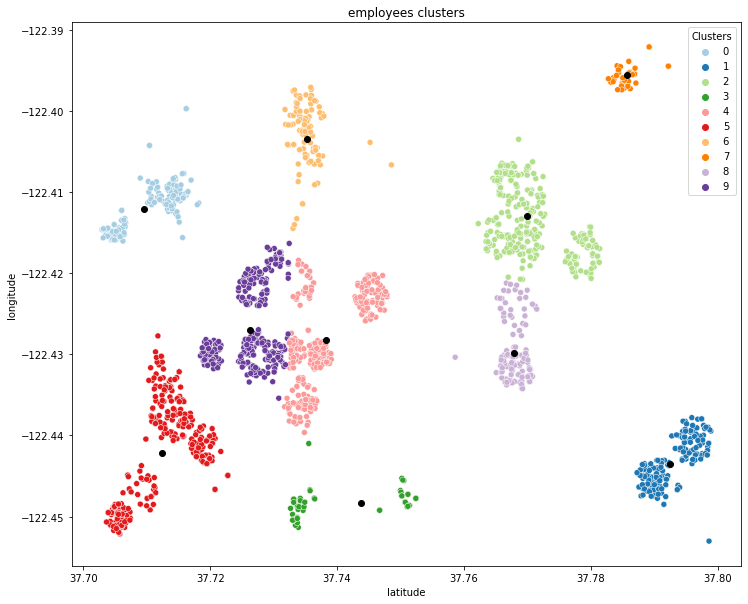

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=emp_addresses['latitude'],y= emp_addresses['longitude'],hue=emp_addresses['Clusters'],palette="Paired")
plt.scatter(x=cf['latitude'],y= cf['longitude'],color='black')
plt.title('employees clusters')

## Calculate the distance between bus stations points and the 10 centroids 
- In this stage of the project, we need to merge coordinates of Potential Bus Stops and Cluster centroids into one array. This merging will help us to find the closest bus stop to the centroid of particular cluster.

- Overall Bus Stops Selection Procedure can be described as follow:

As an Input we use an array of n points. As an Output we will get the smallest distance between two points in the given array. After making a few sorting procedure we will be able to find ten bus stops with minimum distances to cluster centroids.

In [ ]:
bus_stopsll=bus_stops.iloc[:,5:7]

In [ ]:
bus_stopsll=bus_stopsll.to_numpy()

In [ ]:
dist_list={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
# apply ecludiean distance between each bus stops and each centroids
for i in range(len(Cetroids)):
    for j in range(len(bus_stopsll)):
        dist = np.linalg.norm(bus_stopsll[j]-Cetroids[i] )
        dist_list[i].append(dist)


In [ ]:
#get the index of bus station with the smallest distance between it and the corresponding centroid
lcluster=[]
for i in dist_list:
    lcluster.append(dist_list[i].index(min(dist_list[i])))

In [ ]:
lcluster

[32, 19, 17, 31, 7, 21, 3, 1, 6, 32]

In [ ]:
df=pd.DataFrame()

In [ ]:
l=[]
for i in lcluster:
    l.append(bus_stopsll[i])

In [ ]:
l_latitude=[]
l_longitude=[]
for i in range(len(l)):
    l_latitude.append(l[i][0])
    l_longitude.append(l[i][1])

In [ ]:
df=pd.DataFrame()

In [ ]:
df['latitude']=l_latitude

In [ ]:
df['longitude']=l_longitude

In [ ]:
address=bus_stops.iloc[[32, 19, 17, 31, 7, 21, 3, 1, 6, 32],[2]]

In [ ]:
df['address']=address.to_numpy()

In [ ]:
df['Clusters']=kmeans.fit_predict(df.iloc[:,0:2])

C:\Users\saiko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [ ]:
df

,latitude,longitude,Clusters,address
0,37.723969,-122.428866,4,"MISSION ST, EXCELSIOR AVE, San Francisco, CA, USA"
1,37.767528,-122.432299,8,"MISSION ST, 14TH ST, San Francisco, CA, USA"
2,37.773533,-122.416127,6,"MISSION ST, 11TH ST, San Francisco, CA, USA"
3,37.733073,-122.432201,7,"MISSION ST, BOSWORTH ST, San Francisco, CA, USA"
4,37.736648,-122.423178,2,"MISSION ST, PARK ST, San Francisco, CA, USA"
5,37.710731,-122.452530,0,"MISSION ST, LAWRENCE AVE, San Francisco, CA, USA"
6,37.732696,-122.405246,5,"MISSION ST, SILVER AVE, San Francisco, CA, USA"
7,37.786844,-122.392176,3,"MISSION ST, FREMONT ST, San Francisco, CA, USA"
8,37.766139,-122.428823,1,"MISSION ST, 15TH ST, San Francisco, CA, USA"
9,37.723969,-122.428866,4,"MISSION ST, EXCELSIOR AVE, San Francisco, CA, USA"


Text(0.5, 1.0, 'employees and nearest bus stations')

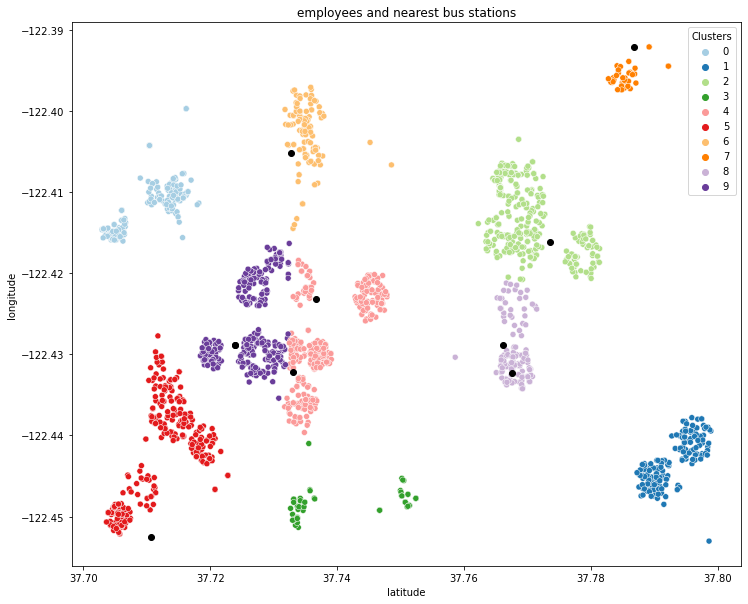

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=emp_addresses['latitude'],y= emp_addresses['longitude'],hue=emp_addresses['Clusters'],palette="Paired")
plt.scatter(x=df['latitude'],y= df['longitude'],color='black')
plt.title('employees and nearest bus stations')

## Calculate the average walking distance per employee to their respective stops and report it at the end of your work.

In [ ]:
import numpy as np

In [ ]:
def calculate_distance(num):
    df4=emp_addresses.loc[emp_addresses['Clusters']== num]
    npbase=df.loc[df['Clusters']== num]
    np4=df4.iloc[:,5:7].to_numpy()
    npp=npbase.iloc[[0],0:2].to_numpy()
    base=npbase.iloc[[0],[3]]
    lp=[]
    bs=[]
    for i in range(1):
        for j in range(len(np4)):
            ll = np.linalg.norm(np4[j]-npp[i] )
            lp.append(ll)
            bs.append(base['address'])
    df4['bus_station']=bs
    df4['distance']= lp
    return df4
    
    

In [ ]:
report=pd.DataFrame()

In [ ]:
frames=[]
for i in range(len(df)): 
    new_df = calculate_distance(df['Clusters'][i])
    frames.append(new_df)
    report = pd.concat( frames, axis=0, ignore_index=True)

In [ ]:
report

,Unnamed: 0,address,employee_id,location,point,latitude,longitude,altitude,Clusters,bus_station,distance
0,4,"16 Roanoke St, San Francisco, CA 94131, USA",1863,"16, Roanoke Street, Glen Park, San Francisco, ...","(37.7364215625, -122.43127664583334, 0.0)",37.736422,-122.431277,0.0,4,"0 MISSION ST, EXCELSIOR AVE, San Francisco,...",0.012684
1,9,"230 Murray St, San Francisco, CA 94112, USA",2015,"230, Murray Street, St. Mary's Park, San Franc...","(37.733565227229334, -122.42315553895536, 0.0)",37.733565,-122.423156,0.0,4,"0 MISSION ST, EXCELSIOR AVE, San Francisco,...",0.011167
2,24,"53 Everson St, San Francisco, CA 94131, USA",57,"53, Everson Street, Glen Park, San Francisco, ...","(37.73839670644726, -122.43050310524086, 0.0)",37.738397,-122.430503,0.0,4,"0 MISSION ST, EXCELSIOR AVE, San Francisco,...",0.014520
3,37,"431 Murray St, San Francisco, CA 94110, USA",115,"431, Murray Street, St. Mary's Park, San Franc...","(37.73533148979592, -122.42030475510204, 0.0)",37.735331,-122.420305,0.0,4,"0 MISSION ST, EXCELSIOR AVE, San Francisco,...",0.014227
4,41,"146 Valley St, San Francisco, CA 94131, USA",1114,"146, Valley Street, Noe Valley, San Francisco,...","(37.744646, -122.42564966666666, 0.0)",37.744646,-122.425650,0.0,4,"0 MISSION ST, EXCELSIOR AVE, San Francisco,...",0.020926
...,...,...,...,...,...,...,...,...,...,...,...
2180,2167,"75 Everson St, San Francisco, CA 94131, USA",1851,"75, Everson Street, Glen Park, San Francisco, ...","(37.73833366666667, -122.43095933333333, 0.0)",37.738334,-122.430959,0.0,4,"0 MISSION ST, EXCELSIOR AVE, San Francisco,...",0.014517
2181,2168,"293 Surrey St, San Francisco, CA 94131, USA",148,"293, Surrey Street, Glen Park, San Francisco, ...","(37.735769048799185, -122.43654841476362, 0.0)",37.735769,-122.436548,0.0,4,"0 MISSION ST, EXCELSIOR AVE, San Francisco,...",0.014081
2182,2173,"448 Laidley St, San Francisco, CA 94131, USA",1473,"448, Laidley Street, Glen Park, San Francisco,...","(37.736574346938774, -122.43021353061224, 0.0)",37.736574,-122.430214,0.0,4,"0 MISSION ST, EXCELSIOR AVE, San Francisco,...",0.012677
2183,2176,"70 Van Buren St, San Francisco, CA 94131, USA",1721,"70, Van Buren Street, Glen Park, San Francisco...","(37.736180312939624, -122.43563540692278, 0.0)",37.736180,-122.435635,0.0,4,"0 MISSION ST, EXCELSIOR AVE, San Francisco,...",0.013962


In [ ]:
report.to_csv("report.csv",index=False)